In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Importing csv file

In [45]:
raw_df = pd.read_csv("Copper_Set.xlsx - Result 1.csv")

## Understanding Data

In [46]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [47]:
raw_df.shape #(row, column)

(181673, 14)

In [48]:
raw_df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

### About Data
* id: Unique identifier for each transaction or item.
* item_date: Date when each transaction or item was recorded.
* quantity tons: Quantity of the item in tons.
* customer: Name or identifier of the customer associated with each transaction.
* country: Country associated with each customer.
* status: Current status of the transaction or item.
* item type: Category or type of the items being sold or produced.
* application: Specific use or application of the items.
* thickness: Thickness of the items.
* width: Width of the items.
* material_ref: Reference or identifier for the material used in the items.
* product_ref: Reference or identifier for the specific product.
* delivery date: Expected or actual delivery date for each item or transaction.
* selling_price: Price at which the items are sold.

In [49]:
# checking for NULL values

raw_df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

## Droping `id` and `material_ref` column

In [50]:
# we will drop "id" column as it is not useful
# We will also drop the "material_ref" column since it has maximum null values

raw_df.drop(columns=["id","material_ref"],inplace=True)

## Handling Data Types

In [51]:
#converting the datatypes quantity tons, item_date, delivery date
# errors="coerce" --> problematic values will be set to NaN (missing value) instead of raising an error.

raw_df["quantity tons"] = pd.to_numeric(raw_df["quantity tons"], errors="coerce")
raw_df["item_date"] = pd.to_datetime(raw_df["item_date"], format="%Y%m%d", errors="coerce").dt.date
raw_df["delivery date"] = pd.to_datetime(raw_df["delivery date"],format="%Y%m%d", errors="coerce").dt.date

In [52]:
raw_df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


## Handling the Negative Values

In [53]:
# Check for negative values in all columns
numeric_columns = raw_df.select_dtypes(include=['number'])

negative_values_exist = (numeric_columns < 0).any()
print(negative_values_exist)

quantity tons     True
customer         False
country          False
application      False
thickness        False
width            False
product_ref      False
selling_price     True
dtype: bool


In [54]:
# "quantity tons" and "selling_price" have negative values, so we will replace the negative values with NaN

raw_df["quantity tons"]= raw_df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
raw_df["selling_price"]= raw_df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [55]:
raw_df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


## Handle missing values

In [56]:
raw_df.isnull().sum()

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [57]:
# replacing the null values in "categorical variable" with the "mode" of that column

raw_df["item_date"].fillna(raw_df["item_date"].mode().iloc[0],inplace=True)
raw_df["status"].fillna(raw_df["status"].mode().iloc[0],inplace=True)
raw_df["delivery date"]. fillna(raw_df["delivery date"].mode().iloc[0],inplace=True)

In [58]:
# replacing the null values in "continuous variable" with the "median" of that column

raw_df["quantity tons"].fillna(raw_df["quantity tons"].median(),inplace=True)
raw_df["customer"].fillna(raw_df["customer"].median(),inplace=True)
raw_df["country"].fillna(raw_df["country"].median(),inplace=True)
raw_df["application"].fillna(raw_df["application"].median(),inplace=True)
raw_df["thickness"].fillna(raw_df["thickness"].median(),inplace=True)
raw_df["selling_price"].fillna(raw_df["selling_price"].median(),inplace=True)

In [59]:
raw_df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

## Encoding the catagorical variables

In [60]:
raw_df.nunique()

item_date           250
quantity tons    181669
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
product_ref          33
delivery date        26
selling_price      9789
dtype: int64

### status &rarr; Ordinal Encoding

In [61]:
raw_df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [62]:
raw_df["status"]= raw_df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                        'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [63]:
raw_df["status"].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [64]:
raw_df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,1,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,1,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,1,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,1,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,1,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


### item type &rarr; Label Encoding

In [65]:
raw_df["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [66]:
#raw_df["item type"]= OrdinalEncoder().fit_transform(raw_df[["item type"]])

In [67]:
raw_df["item type"]= LabelEncoder().fit_transform(raw_df["item type"])

In [68]:
raw_df["item type"].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [69]:
raw_df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,1,5,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,1,5,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,1,6,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,1,3,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,1,5,10.0,4.00,2000.0,640665,2021-03-01,577.00


## Save as csv

In [70]:
raw_df.to_csv("Industrial_Copper_Modeling.csv",index= False)

# Statistical Analysis

In [5]:
# Read the saved csv file
df = pd.read_csv("Industrial_Copper_Modeling.csv")

In [73]:
df = raw_df.copy()

## Handling Skewness &rarr; Log Transformation

In [6]:
# Function for histogram 
def plot_histograms(df, cols):

    plt.figure(figsize=(10, 15))

    for i, col in enumerate(cols):
        plt.subplot(5,2, i+1)
        sns.histplot(df[col],kde= True, bins=30, color="salmon")
        plt.title("Histogram for " + col)
    plt.tight_layout()
    plt.show()

In [7]:
num_columns = df[['quantity tons', 'customer', 'country', 'item type', 'application', 
                     'thickness', 'width', 'product_ref','selling_price']]
    

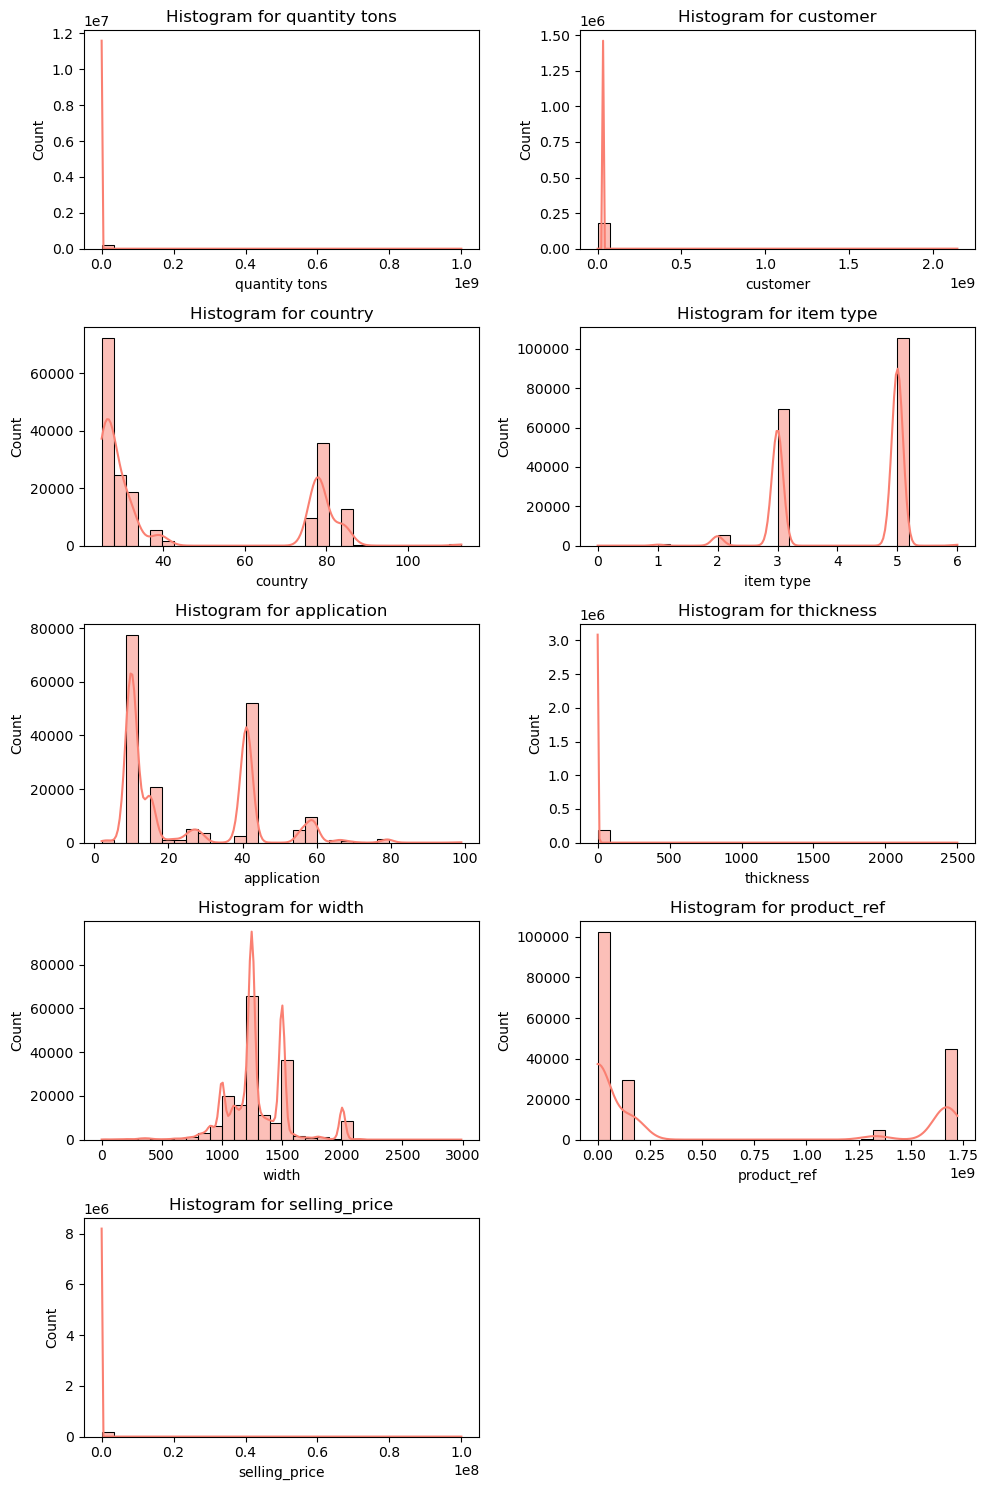

In [76]:
plot_histograms(df, num_columns)

### Skewed columns

* quantity tons
* customer
* country
* application
* thickness
* width
* product_ref
* selling_price

In [8]:
skew_columns = df[['quantity tons', 'customer', 'country', 'application', 
                     'thickness', 'width', 'product_ref','selling_price']]

In [9]:
df1= df.copy()

In [10]:
df1["quantity_tons_log"] = np.log(df1["quantity tons"])
df1["customer_log"] = np.log(df1["customer"])
df1["country_log"] = np.log(df1["country"])
df1["application_log"] = np.log(df1["application"])
df1["thickness_log"] = np.log(df1["thickness"])
df1["width_log"] = np.log(df1["width"])
df1["product_ref_log"] = np.log(df1["product_ref"])
df1["selling_price_log"] = np.log(df1["selling_price"])

In [11]:
log_columns = df1[['quantity_tons_log', 'customer_log','country_log','application_log', 
                   'thickness_log','width_log','product_ref_log', 'selling_price_log']]


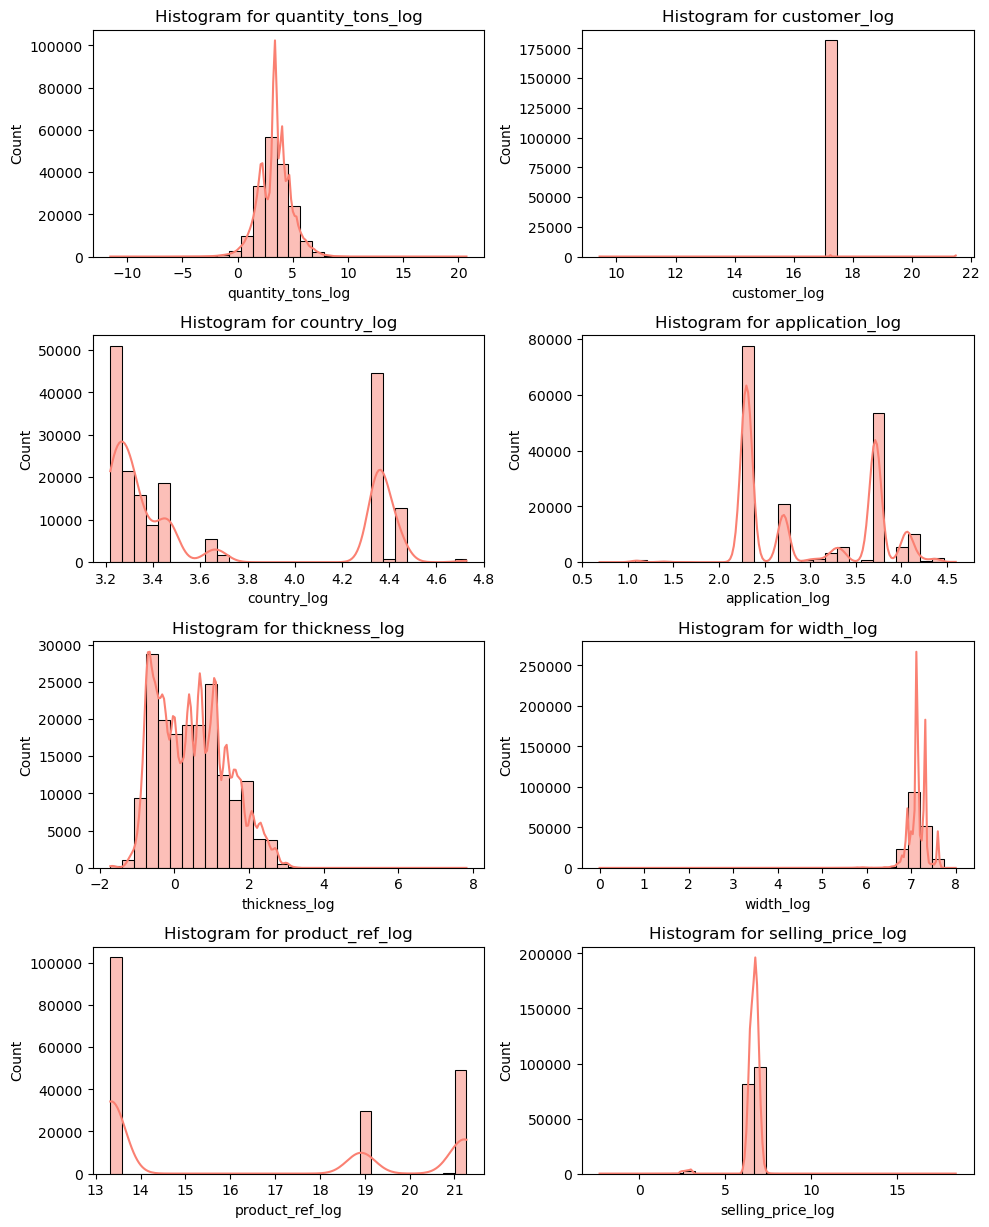

In [105]:
plot_histograms(df1, log_columns)

## Handling Outliers &rarr; Interquartile Range(IQR) Method

In [12]:
log_columns = df1[['quantity_tons_log', 'customer_log','country_log','application_log', 
                   'thickness_log','width_log','product_ref_log', 'selling_price_log']]

In [13]:
# Function for box plot   
def plot_box_plots(df, cols):

    plt.figure(figsize=(10, 12))
    
    for i, col in enumerate(cols):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(y=df[col], whis=10.)
        plt.title("Box Plot for " + col)
    plt.tight_layout()
    plt.show()

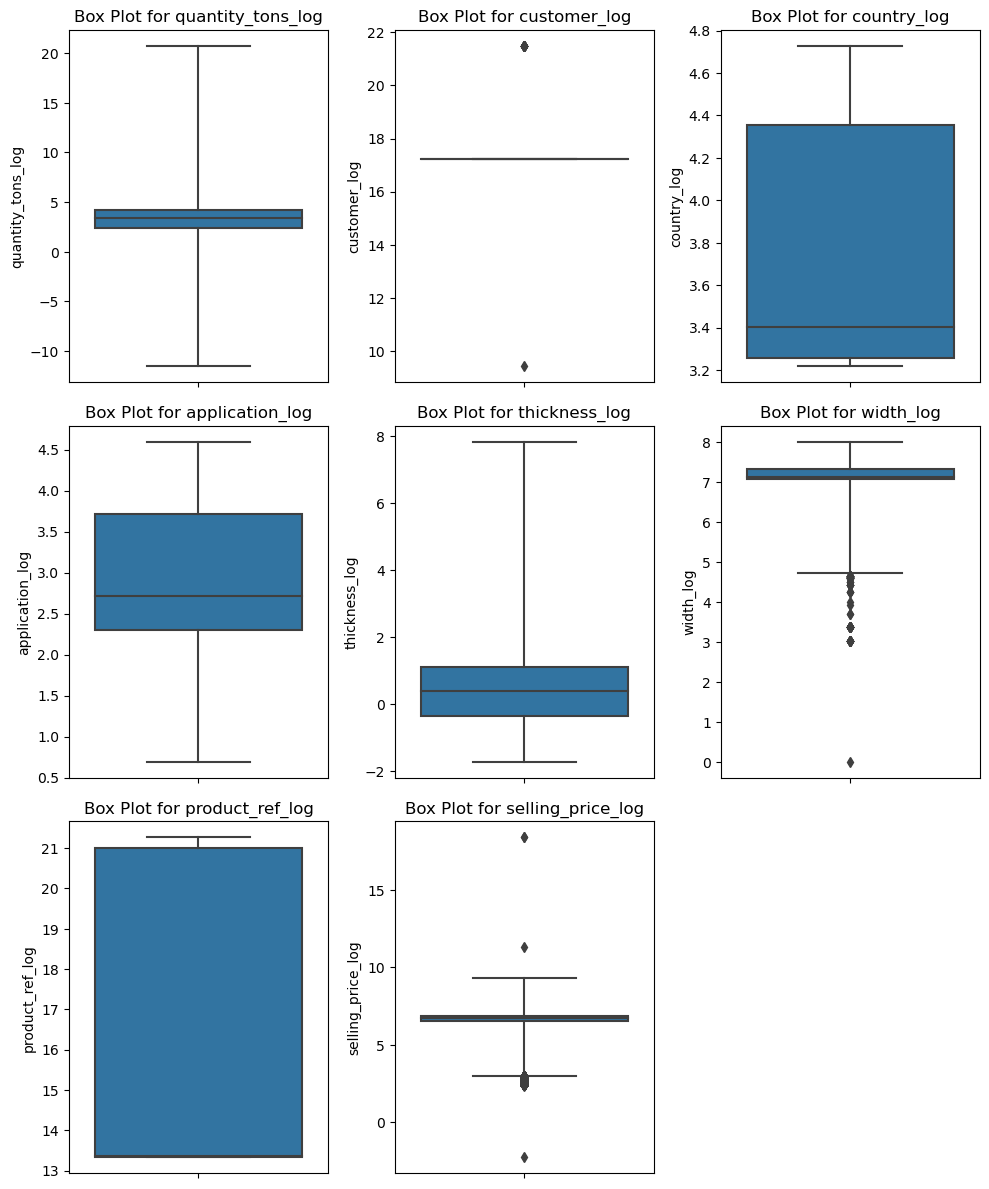

In [108]:
plot_box_plots(df1, log_columns)

### Outlier columns

* customer_log
* width_log
* selling_price_log

In [14]:
# converts all the values above the upper threshold to the upper threshold value
# converts all the values below the lower threshold to the lower threshold value

def outlier(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3-Q1

    upper_threshold = Q3 + (1.5*IQR)
    lower_threshold = Q1 - (1.5*IQR)

    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [15]:
# outlier_columns = df1[['customer_log', 'width_log', 'selling_price_log']]

outlier_columns = ['customer_log', 'width_log', 'selling_price_log']


In [16]:
for i in outlier_columns:
    outlier(df1,i)

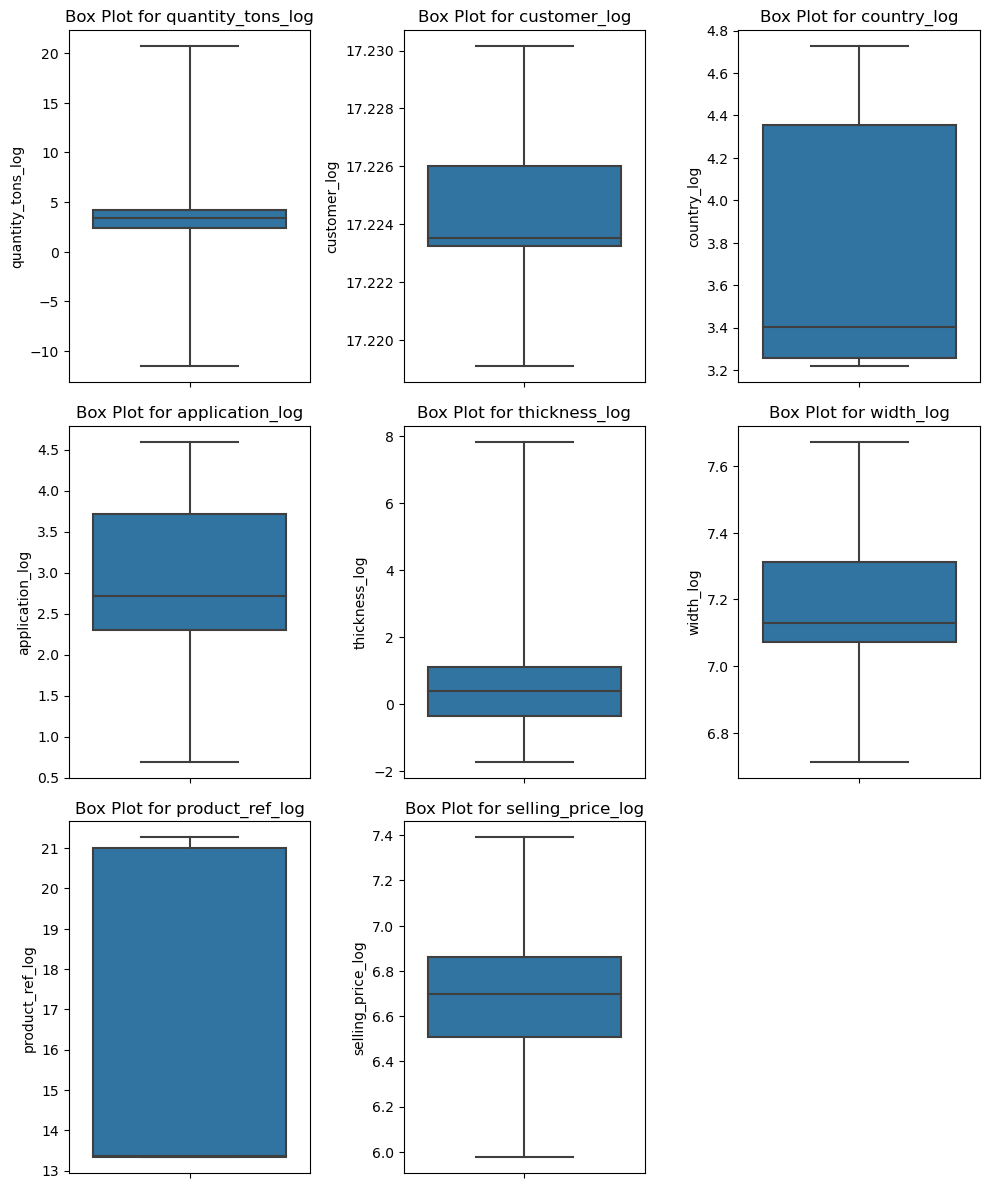

In [112]:
plot_box_plots(df1, log_columns)

In [17]:
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons_log,customer_log,country_log,application_log,thickness_log,width_log,product_ref_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,1,5,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,17.221905,3.332205,2.302585,0.693147,7.313220,21.236568,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,1,5,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,17.223450,3.218876,3.713572,-0.223144,7.098376,21.235312,6.953684
2,2021-04-01,386.127949,30153963.0,30.0,1,6,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,17.221827,3.401197,3.332205,-0.967584,6.858565,13.350896,6.468211
3,2021-04-01,202.411065,30349574.0,32.0,1,3,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,17.228293,3.465736,4.077537,0.832909,7.183112,21.235312,6.643790
4,2021-04-01,785.526262,30211560.0,28.0,1,5,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.666354,17.223735,3.332205,2.302585,1.386294,7.600902,13.370262,6.357842


In [118]:
# Droping the unwanted skewed columns

In [18]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'quantity_tons_log', 'customer_log',
       'country_log', 'application_log', 'thickness_log', 'width_log',
       'product_ref_log', 'selling_price_log'],
      dtype='object')

Dropping

* quantity tons
* customer
* country
* application
* thickness
* width 
* product_ref
* selling_price


     

In [19]:
df2 = df1.drop(columns=["quantity tons","customer","country","application",
                       "thickness","width","product_ref","selling_price"])

In [20]:
df2.head()

,item_date,status,item type,delivery date,quantity_tons_log,customer_log,country_log,application_log,thickness_log,width_log,product_ref_log,selling_price_log
0,2021-04-01,1,5,2021-07-01,3.991779,17.221905,3.332205,2.302585,0.693147,7.313220,21.236568,6.749931
1,2021-04-01,1,5,2021-04-01,6.643822,17.223450,3.218876,3.713572,-0.223144,7.098376,21.235312,6.953684
2,2021-04-01,1,6,2021-01-01,5.956169,17.221827,3.401197,3.332205,-0.967584,6.858565,13.350896,6.468211
3,2021-04-01,1,3,2021-01-01,5.310301,17.228293,3.465736,4.077537,0.832909,7.183112,21.235312,6.643790
4,2021-04-01,1,5,2021-03-01,6.666354,17.223735,3.332205,2.302585,1.386294,7.600902,13.370262,6.357842


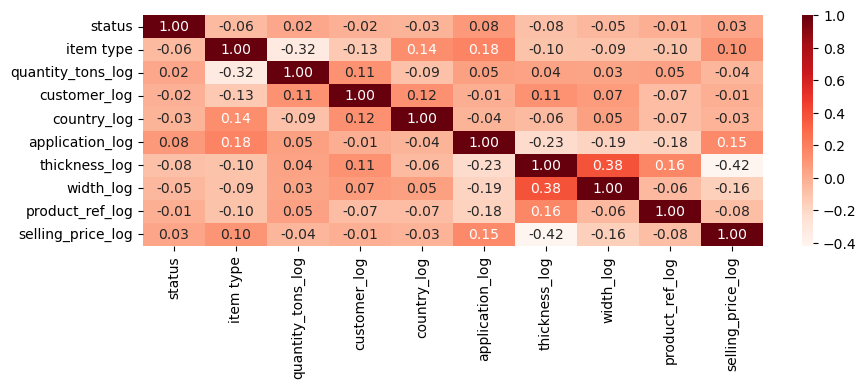

In [122]:
#Checking the correlation with using the heatmap

corr  = df2.drop(columns=["item_date","delivery date"]).corr()

plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f", cmap='Reds')
plt.show()


# Classification model which predicts Status: WON or LOST

In [21]:
# import
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, auc, roc_curve, confusion_matrix, classification_report

from imblearn.combine import SMOTETomek

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import pickle

In [22]:
df_class = df2.copy()

In [23]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   item_date          181673 non-null  object 
 1   status             181673 non-null  int64  
 2   item type          181673 non-null  int64  
 3   delivery date      181673 non-null  object 
 4   quantity_tons_log  181673 non-null  float64
 5   customer_log       181673 non-null  float64
 6   country_log        181673 non-null  float64
 7   application_log    181673 non-null  float64
 8   thickness_log      181673 non-null  float64
 9   width_log          181673 non-null  float64
 10  product_ref_log    181673 non-null  float64
 11  selling_price_log  181673 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 16.6+ MB


In [24]:
df_class.head()

,item_date,status,item type,delivery date,quantity_tons_log,customer_log,country_log,application_log,thickness_log,width_log,product_ref_log,selling_price_log
0,2021-04-01,1,5,2021-07-01,3.991779,17.221905,3.332205,2.302585,0.693147,7.313220,21.236568,6.749931
1,2021-04-01,1,5,2021-04-01,6.643822,17.223450,3.218876,3.713572,-0.223144,7.098376,21.235312,6.953684
2,2021-04-01,1,6,2021-01-01,5.956169,17.221827,3.401197,3.332205,-0.967584,6.858565,13.350896,6.468211
3,2021-04-01,1,3,2021-01-01,5.310301,17.228293,3.465736,4.077537,0.832909,7.183112,21.235312,6.643790
4,2021-04-01,1,5,2021-03-01,6.666354,17.223735,3.332205,2.302585,1.386294,7.600902,13.370262,6.357842


In [25]:
# filter the status column only by want we want i.e., won & lost
df_class_1 = df_class[(df_class["status"] == 1) | (df_class["status"] == 0)]

In [26]:
df_class_1["status"].unique()

array([1, 0], dtype=int64)

In [27]:
df_class_1["status"].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

&uarr; This is a imbalanced data 

## Handling Imbalanced feature &rarr; "SMOTE-Tomek"

This method combines 
* SMOTE ability to generate synthetic data for minority class 
* Tomek Links ability to remove the data that are identified as Tomek links from the majority class

In [28]:
df_class_1.columns

Index(['item_date', 'status', 'item type', 'delivery date',
       'quantity_tons_log', 'customer_log', 'country_log', 'application_log',
       'thickness_log', 'width_log', 'product_ref_log', 'selling_price_log'],
      dtype='object')

In [29]:
### Data Splitting

x = df_class_1.drop(columns=["status","item_date","delivery date"],axis=1) # independent variables.
y = df_class_1["status"] # dependent variable

In [30]:
x.shape, y.shape

((150450, 9), (150450,))

### Resampling using SMOTE-Tomek

In [31]:
x_new, y_new = SMOTETomek().fit_resample(x,y)

In [134]:
x_new.shape, y_new.shape

((227206, 9), (227206,))

In [135]:
y_new.value_counts()

status
1    113603
0    113603
Name: count, dtype: int64

&uarr; Now the data is balanced and we can prepare the model

In [136]:
# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
    
    # splitting train & test 
    x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.25, random_state=42)

    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #checking the accuracy_score
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    metrics ={"Algorithm": algorithm.__name__,
               "Accuracy_Train": accuracy_train,
               "Accuracy_Test": accuracy_test}
    return metrics

In [137]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9111477414723633}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9371759763911414}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9330550607502726}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8088127121422938, 'Accuracy_Test': 0.8071411480073379}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8337247534053547, 'Accuracy_Test': 0.829766304203334}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9101890337389331, 'Accuracy_Test': 0.8985191290245393}


In [138]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9395795922678779}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9629414457237421}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9647547621562621}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7517370484260932, 'Accuracy_Test': 0.7506953980493645}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.7903511654655994, 'Accuracy_Test': 0.7909052498151473}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9195324053425976, 'Accuracy_Test': 0.9102672441111228}


In [139]:
# we got good accuracy after SMOTE-Tomek

# ExtraTreesClassifier has good test accuracy, but train accuracy is overfitted.

In [140]:
# we will now reduce the overfitting by tuning the hyperparameter by GridsearchCV

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.25, random_state = 42)

In [142]:
parameters = {"max_depth": [10,20,30],"n_estimators": [100,200,300]} 

# "min_samples_split": [5,10,15],"min_samples_leaf": [2,4,6]

In [145]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters, cv = 5, n_jobs = -1) 
# n_jobs=-1 indicates that computation will be distributed across all available CPU cores for faster processing

In [146]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [147]:
print("Best Score: ", grid_search.best_score_)

Best Score:  0.9592615285277976


In [148]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 30, 'n_estimators': 300}


In [149]:
### Passing the hyperparameters in the Random Forest algorithm

In [152]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.25, random_state= 42)

model = RandomForestClassifier(max_depth = 30, n_estimators= 300).fit(x_train, y_train)
 
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [154]:
## Performance Metrics

In [155]:
# accuracy_score for train and test

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9997711321330485
Accuracy_Test:  0.9630470758071898


In [156]:
# confution matrics 

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true = y_test, y_pred = y_pred_test))

Confution_matrix for Test
--------------------------
[[27690   768]
 [ 1331 27013]]


* y_true: The true labels of the testing set.
* y_pred: The predicted labels of the testing set.

In [158]:
# classification report
# classification report typically includes metrics such as precision, recall, F1-score, and support

print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     28458
           1       0.97      0.95      0.96     28344

    accuracy                           0.96     56802
   macro avg       0.96      0.96      0.96     56802
weighted avg       0.96      0.96      0.96     56802



In [159]:
# Now the Accuracy_Train overfitting is reduced.
# Hence the model will predict effectively for unseen data

In [161]:
# Receiver Operating Characteristic (ROC) Curve

FP, TP, Threshold = roc_curve(y_true=y_test, y_score=y_pred_test)

print(FP)
print(TP)
print(Threshold)


[0.         0.02698714 1.        ]
[0.         0.95304121 1.        ]
[2 1 0]


* FP: An array containing the false positive rates corresponding to different threshold values.
* TP: An array containing the true positive rates corresponding to different threshold values.
* Threshold: An array containing the threshold values used to compute the false positive and true positive rates.

In [162]:
# Area Under the Curve (AUC)

auc_curve = auc(x=FP, y=TP)
print("auc_curve: ", auc_curve)

auc_curve:  0.9630270345371038


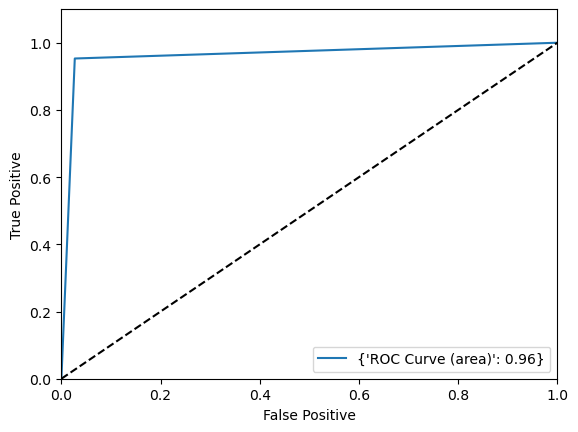

In [163]:
# create a plot for ROC and AUC curve

roc_point= {"ROC Curve (area)":round(auc_curve, 2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [164]:
## Saving the MODEL using the pickle

In [165]:
with open("Classification_Model.pkl","wb") as f:
    pickle.dump(model,f)

In [166]:
## Loading the MODEL

In [168]:
with open("C:/Users/Desilva/Python/Industrial_Copper_Modeling/Classification_Model.pkl", "rb") as m1:
    status_check = pickle.load(m1)

In [195]:
#Check

In [194]:
min_values = df_class.min()
max_values = df_class.max()

# Concatenate min_values and max_values along the columns axis
min_max_df = pd.concat([min_values, max_values], axis=1)
min_max_df.columns = ['Minimum', 'Maximum']

print("Minimum and Maximum values of all columns:")
print(" ")
print(min_max_df)

Minimum and Maximum values of all columns:
 
                      Minimum     Maximum
item_date          2020-07-02  2021-04-01
status                      0           8
item type                   0           6
delivery date      2019-04-01  2022-01-01
quantity_tons_log  -11.512925   20.723266
customer_log        17.219106   17.230155
country_log          3.218876    4.727388
application_log      0.693147     4.59512
thickness_log       -1.714798    7.824046
width_log            6.713344    7.673146
product_ref_log     13.324043   21.266873
selling_price_log    5.975038    7.390361


In [191]:
# user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696]])
# y_pred_user= status_check.predict(user_data)

# if y_pred_user == 1:
#     print("Won")
# else:
#     print("Lose")

_____________________

# Regression model which predicts continuous variable ‘Selling_Price’

In [173]:
#packages

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import pickle

In [174]:
df_reg = df2.copy()

In [175]:
df_reg.head(1)

,item_date,status,item type,delivery date,quantity_tons_log,customer_log,country_log,application_log,thickness_log,width_log,product_ref_log,selling_price_log
0,2021-04-01,1,5,2021-07-01,3.991779,17.221905,3.332205,2.302585,0.693147,7.31322,21.236568,6.749931


In [55]:
### Data Splitting

x = df_class_1.drop(columns=["selling_price_log","item_date","delivery date"],axis=1) # independent variables.
y = df_class_1["selling_price_log"] # dependent variable

In [59]:
df2["status"].min()

0

In [60]:
df2["status"].max()

8

In [176]:
#Function to the best Regression Model to predict the selling price

def accuracy_regressor(df, algorithm):

    x= df.drop(columns=["selling_price_log","item_date","delivery date"], axis=1)
    y= df["selling_price_log"]

    #train test splitting
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # R-squared (R2) scores
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    metrics = {"Algorithm":algorithm.__name__,
               "R2_Train": r2_train,
               "R2_Test": r2_test}

    return metrics


In [177]:
print(accuracy_regressor(df_reg, DecisionTreeRegressor))
print(accuracy_regressor(df_reg, RandomForestRegressor))
print(accuracy_regressor(df_reg, ExtraTreesRegressor))
print(accuracy_regressor(df_reg, AdaBoostRegressor))
print(accuracy_regressor(df_reg, GradientBoostingRegressor))
print(accuracy_regressor(df_reg, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 1.0, 'R2_Test': 0.49427758614842543}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9584223163761343, 'R2_Test': 0.7036565617312642}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 1.0, 'R2_Test': 0.6534742911143872}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.37449082347280216, 'R2_Test': 0.3728073439836198}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.5179519069222828, 'R2_Test': 0.5130778194500594}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.6717910217606418, 'R2_Test': 0.6513652800823319}


In [178]:
# RandomForestClassifier is good

In [179]:
x = df_reg.drop(columns=['selling_price_log',"item_date","delivery date"], axis=1)
y = df_reg['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

model_r = RandomForestRegressor().fit(x_train, y_train)

y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)


## Performance Metrics

In [181]:
# R2 test
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R2 Score for Train and Test")
print("----------------------------------")
print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)

R2 Score for Train and Test
----------------------------------
R2 Train:  0.9585206874885843
R2 Test:  0.7042661703990547


In [182]:
# Mean Absolute Error
# Mean Squared Error
# Root Mean Squared Error

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

metrics_r = {'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

metrics_r

{'Mean Absolute Error': 0.1021780935587723,
 'Mean Squared Error': 0.019231049730033492,
 'Root Mean Squared Error': 0.13867606040709943}

In [183]:
## Saving the MODEL using the pickle

In [184]:
with open("Regression_Model.pkl", "wb") as r:
    pickle.dump(model_r, r)

In [185]:
## Loading the MODEL

In [186]:
with open("Regression_Model.pkl", "rb") as m2:
    price_predict = pickle.load(m2)

In [197]:
#check

In [196]:
min_values = df_reg.min()
max_values = df_reg.max()

# Concatenate min_values and max_values along the columns axis
min_max_df = pd.concat([min_values, max_values], axis=1)
min_max_df.columns = ['Minimum', 'Maximum']

print("Minimum and Maximum values of all columns:")
print(" ")
print(min_max_df)

Minimum and Maximum values of all columns:
 
                      Minimum     Maximum
item_date          2020-07-02  2021-04-01
status                      0           8
item type                   0           6
delivery date      2019-04-01  2022-01-01
quantity_tons_log  -11.512925   20.723266
customer_log        17.219106   17.230155
country_log          3.218876    4.727388
application_log      0.693147     4.59512
thickness_log       -1.714798    7.824046
width_log            6.713344    7.673146
product_ref_log     13.324043   21.266873
selling_price_log    5.975038    7.390361


In [189]:
# user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147]])
# y_pred = price_predict.predict(user_data)

# print("Predicted selling price with Log: ",y_pred[0])

# print("Predicted selling price without Log: ",np.exp(y_pred[0]))

In [199]:
#END